In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [2]:
import pandas as pd

data_path = '../blue_berry/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'id')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv' , index_col= 'id')

In [3]:
train

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394


In [4]:
test

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,
15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724


In [5]:
submission

,yield
id,
15289,6025.194
15290,6025.194
15291,6025.194
15292,6025.194
15293,6025.194
...,...
25478,6025.194
25479,6025.194
25480,6025.194


In [6]:
all_data = pd.concat([train,test]) # 훈련 데이터와 테스트 데이터 합치기
# all_data = all_data.drop('Survived' , axis = 1) # 타깃값 제거
all_data

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258,NaN
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221,NaN
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724,NaN


In [7]:
all_data = all_data.drop('yield' , axis = 1) # 타깃값 제거

all_data

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724


In [8]:
corrMat = train[train.columns.tolist()[:-1]].corr()
corrMat

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
clonesize,1.000000,0.304130,0.080433,0.065131,-0.007607,0.016159,0.015838,0.016057,0.016343,0.016026,0.015987,0.165770,0.164823,-0.406793,-0.377688,-0.396898
honeybee,0.304130,1.000000,-0.017937,0.030671,-0.010394,0.005840,0.005755,0.005892,0.005942,0.005809,0.005485,0.046494,0.037532,-0.120492,-0.135310,-0.139261
bumbles,0.080433,-0.017937,1.000000,-0.164962,0.158001,-0.002104,-0.001813,-0.001769,-0.001613,-0.001804,-0.001644,-0.063294,-0.060232,0.160447,0.163987,0.177022
andrena,0.065131,0.030671,-0.164962,1.000000,0.309556,-0.013061,-0.012928,-0.012993,-0.012924,-0.013035,-0.013071,-0.026572,-0.027193,0.073669,0.064722,0.063504
osmia,-0.007607,-0.010394,0.158001,0.309556,1.000000,-0.031391,-0.030819,-0.031415,-0.031398,-0.031486,-0.031337,-0.079874,-0.078720,0.209495,0.192210,0.200597
MaxOfUpperTRange,0.016159,0.005840,-0.002104,-0.013061,-0.031391,1.000000,0.998599,0.999806,0.999503,0.999829,0.999772,0.011322,0.010352,0.007580,0.146237,0.060963
MinOfUpperTRange,0.015838,0.005755,-0.001813,-0.012928,-0.030819,0.998599,1.000000,0.999004,0.998199,0.998953,0.999040,0.011727,0.010767,0.008409,0.147203,0.061812
AverageOfUpperTRange,0.016057,0.005892,-0.001769,-0.012993,-0.031415,0.999806,0.999004,1.000000,0.999465,0.999973,0.999974,0.011245,0.010260,0.008503,0.147676,0.062082
MaxOfLowerTRange,0.016343,0.005942,-0.001613,-0.012924,-0.031398,0.999503,0.998199,0.999465,1.000000,0.999489,0.999423,0.011302,0.010262,0.007902,0.146668,0.061378
MinOfLowerTRange,0.016026,0.005809,-0.001804,-0.013035,-0.031486,0.999829,0.998953,0.999973,0.999489,1.000000,0.999963,0.011466,0.010479,0.007909,0.146704,0.061360


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

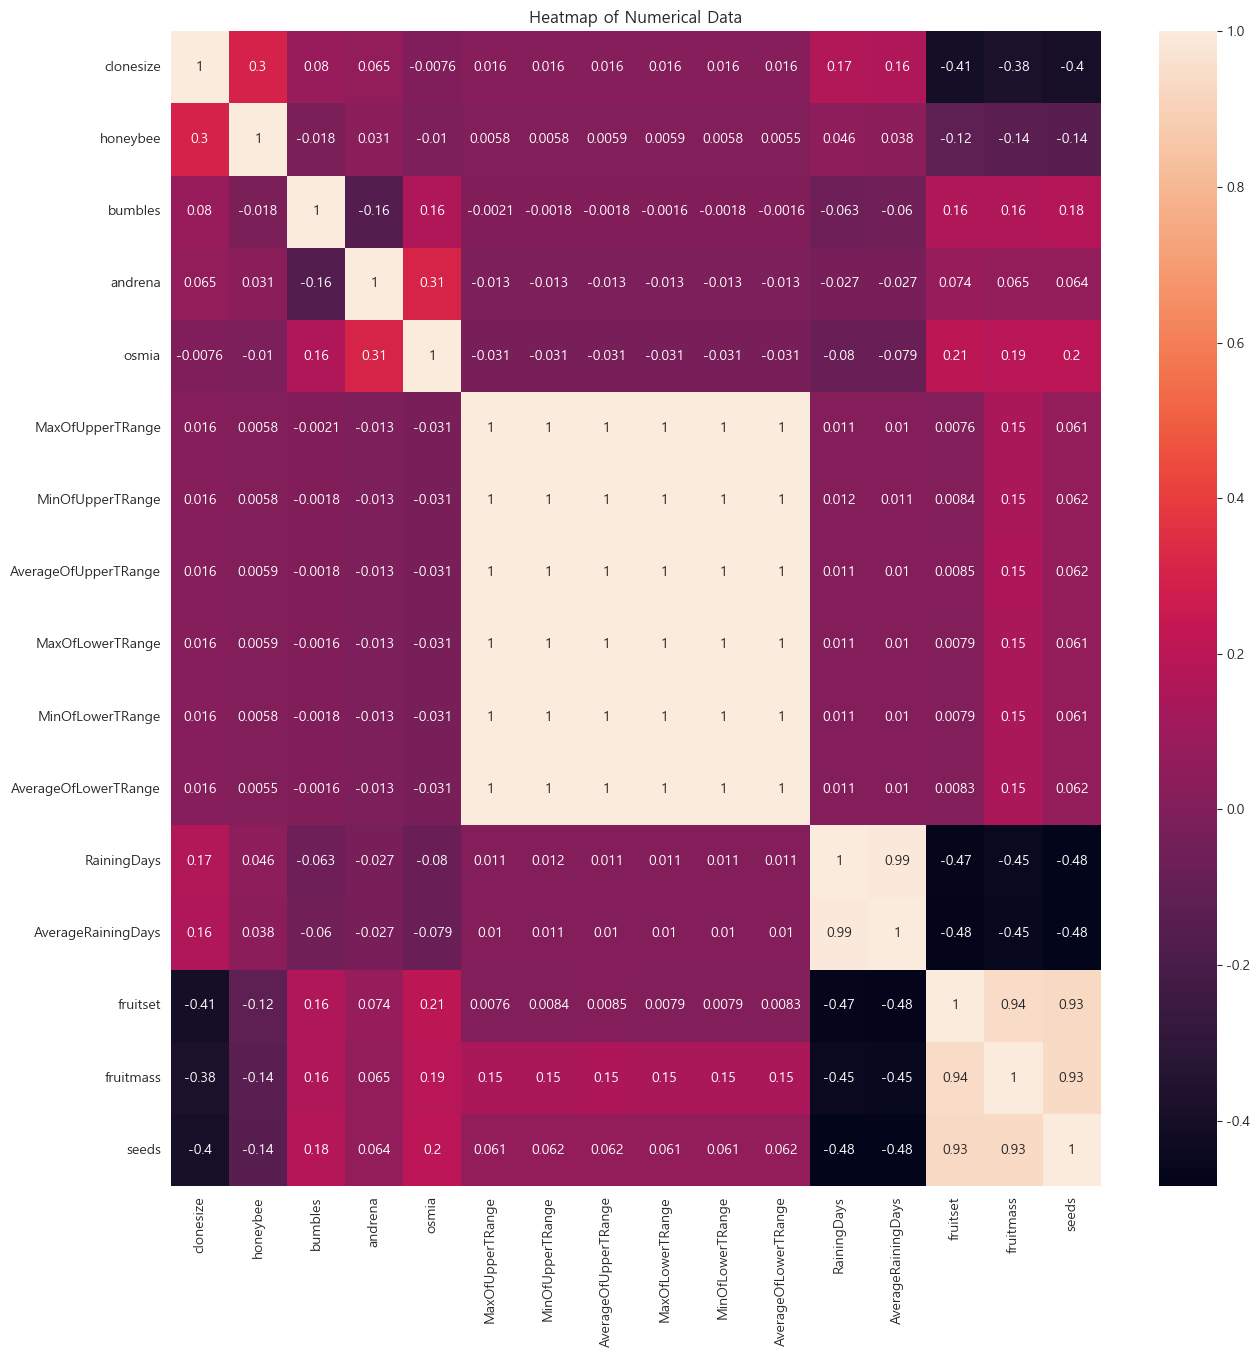

In [9]:
fig,ax = plt.subplots()
fig.set_size_inches(15,15)

sns.heatmap(corrMat , annot =True )
ax.set(title='Heatmap of Numerical Data')

[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

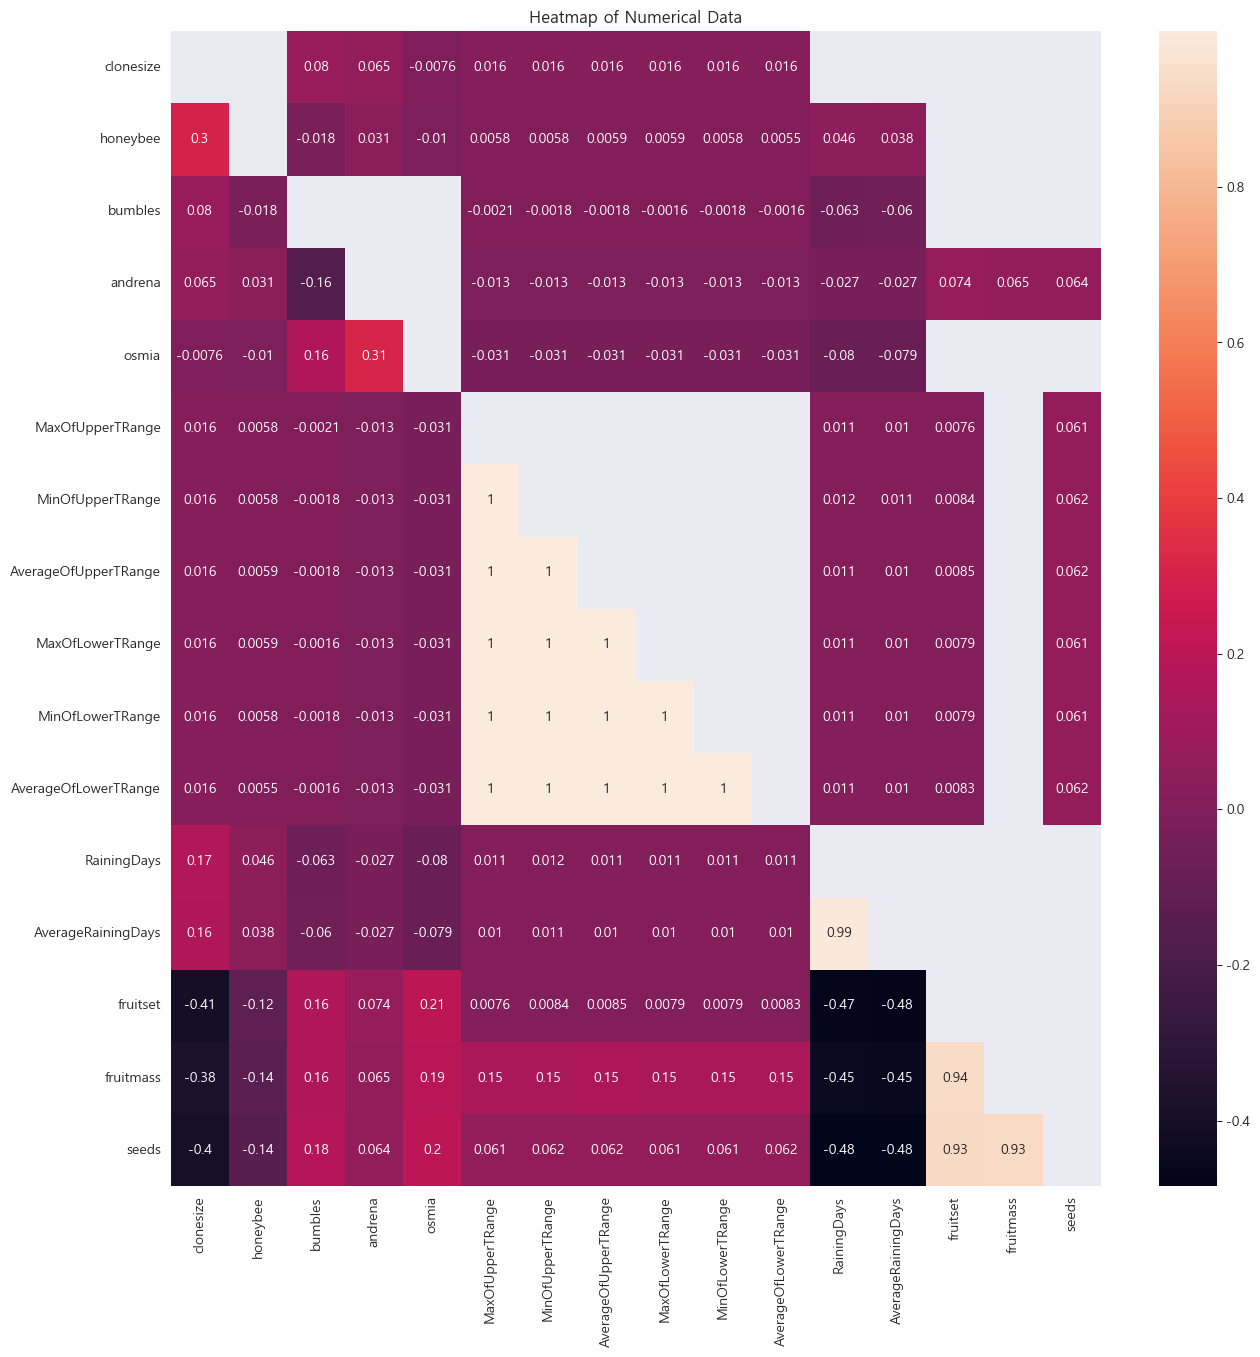

In [10]:
# Mask for correlation values less than 0.1
fig,ax = plt.subplots()
fig.set_size_inches(15,15)
mask = np.zeros_like(corrMat)
mask[np.triu_indices_from(mask)] = True
mask[np.abs(corrMat) < 0.1] = False

sns.heatmap(corrMat, annot=True, mask=mask)
ax.set(title='Heatmap of Numerical Data')

## 베이스라인 모델_랜덤포레스트_회귀

In [11]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y_train = train['yield'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['yield'].values

In [12]:
%%time


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# 선형 회귀 모델 초기화
lr_model = LinearRegression()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid_lr = {
    'fit_intercept': [True, False],        # 절편 사용 여부
    #'normalize': [True, False]             # 특성 정규화 여부
    'n_jobs' : [-1]
}

# 그리드 서치 객체 생성
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5)

# 그리드 서치 수행
grid_search_lr.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_lr = grid_search_lr.best_estimator_
best_params_grid_search_lr = grid_search_lr.best_params_
print("Best Model (Linear Regression):", best_model_grid_search_lr)
print("Best Parameters (Linear Regression):", best_params_grid_search_lr)




Best Model (Linear Regression): LinearRegression(n_jobs=-1)
Best Parameters (Linear Regression): {'fit_intercept': True, 'n_jobs': -1}
Wall time: 336 ms


In [13]:
y_preds = best_model_grid_search_lr.predict(X_test)

y_preds

array([4303.944, 6107.943, 7251.01 , ..., 6935.192, 4449.951, 7325.748])

In [14]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y = train['yield'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
# y_test = correct['Survived'].values

In [15]:
from sklearn.metrics import mean_absolute_error

# 모델 학습 (예시로 Linear Regression 모델 사용)
# model = LinearRegression()
# model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
y_pred = best_model_grid_search_lr.predict(X_valid)

# MAE 계산
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)


MAE: 368.90141447649245


In [16]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_linear_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

현재 날짜 및 시각 :  [6, 2, 14, 23, 47]


In [17]:
all_data.columns.tolist()

['clonesize',
 'honeybee',
 'bumbles',
 'andrena',
 'osmia',
 'MaxOfUpperTRange',
 'MinOfUpperTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'AverageOfLowerTRange',
 'RainingDays',
 'AverageRainingDays',
 'fruitset',
 'fruitmass',
 'seeds']

In [18]:
all_data['clonesize']

id
0        25.0
1        25.0
2        12.5
3        12.5
4        25.0
         ... 
25478    25.0
25479    25.0
25480    25.0
25481    12.5
25482    12.5
Name: clonesize, Length: 25483, dtype: float64

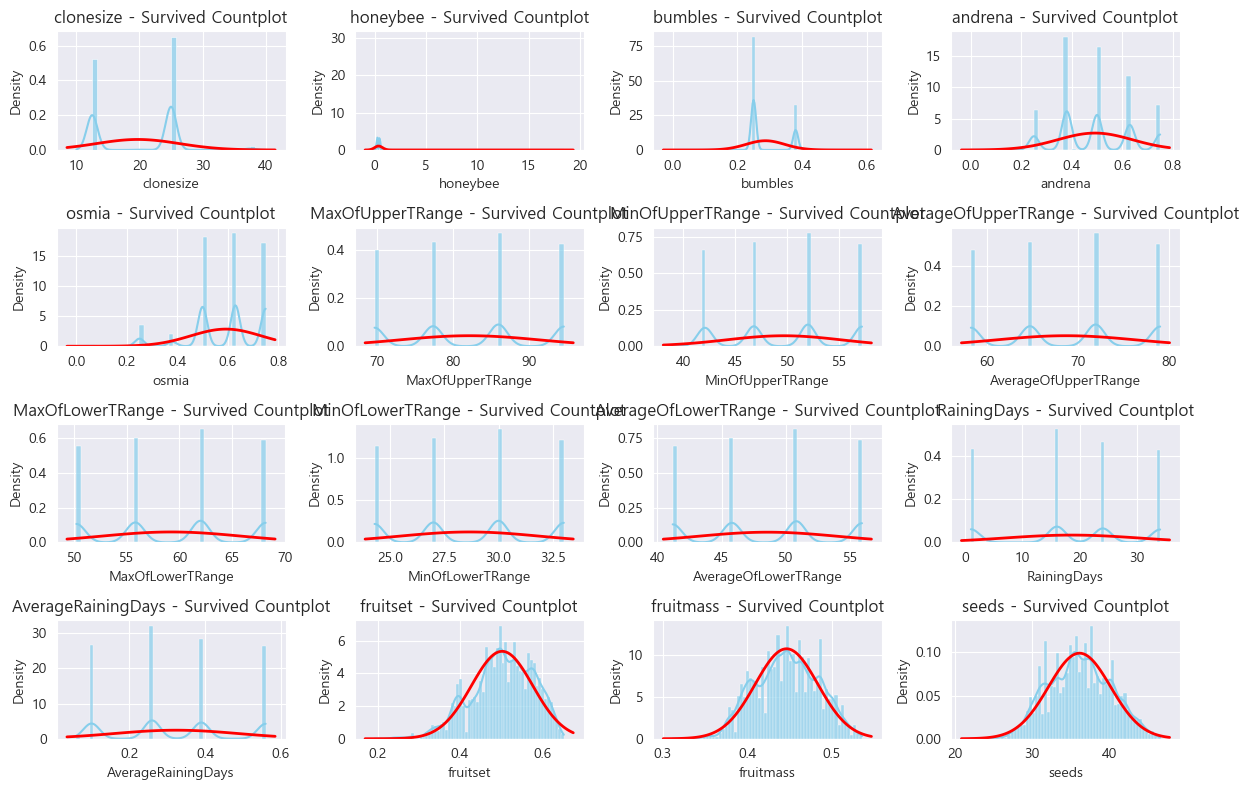

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# 서브플롯을 생성할 크기 설정
plt.figure(figsize=(12, 8))
# sns.countplot(x='clonesize', hue='yield', data=train)
# 피처들의 리스트
features = all_data.columns.tolist()

# 피처들에 대한 countplot 그리기
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.histplot(all_data[feature], kde=True, stat='density', color='skyblue', alpha=0.7)
    mu, std = norm.fit(all_data[feature].dropna())
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2)
    plt.title(f'Features distribution (mu={mu:.2f}, std={std:.2f})')
    plt.title(f'{feature} - Survived Countplot')

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()


Text(0.5, 1.0, 'Features distribution (mu=0.50, std=0.07)')

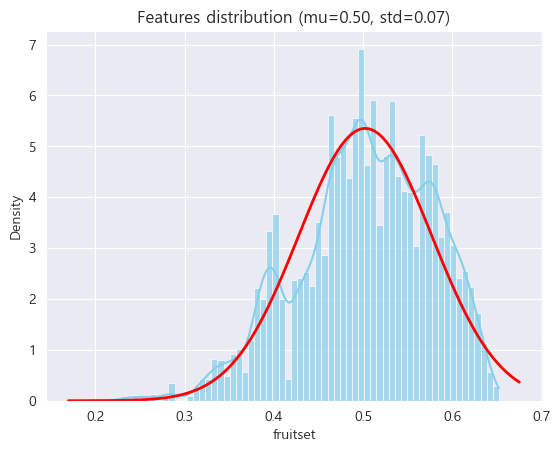

In [20]:
sns.histplot(all_data['fruitset'], kde=True, stat='density', color='skyblue', alpha=0.7)
mu, std = norm.fit(all_data['fruitset'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title(f'Features distribution (mu={mu:.2f}, std={std:.2f})')

In [21]:
# import datetime
#
# # 현재 날짜와 시각 구하기
# now = datetime.datetime.now()
# date_list = [now.month, now.day, now.hour, now.minute]
# # 현재 날짜와 시각 출력하기
# print("현재 날짜 및 시각 : ", date_list)
#
# # 제출 파일 생성
#
# submission['yield'] = y_preds
# submission.to_csv(f'submission_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}.csv')

## 베이스라인 모델 선형 모델

### 그리드서치 객체 생성

- 그리드서치는 하이퍼파라미터의 값을바꿔가며'모델'의 성능을 교차검증으로 '평가'해 최적의 하이퍼파라미터 값을 찾아준다.

- 비교 검증해볼 하이퍼파라미터 값 목록

- 대상 모델

- 교차 검증용 평가 수단(평가 함수)
## 회귀 평가지표

- 회귀 모델을 훈련해 최적의 회귀계수를 구할 수 있다.

In [22]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y_train = train['yield'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['yield'].values

In [23]:
%%time

from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

ridge_model = Ridge()

# 하이퍼파라미터 값 목록
ridge_params = {'max_iter': [30, 50,100,200], 'alpha': [0.01,0.05,0.1, 1] ,
                'random_state' : [42],
                'solver' : ['auto']}

# 교차 검증용 평가 함수(MAE 계산)
mae_scorer = metrics.make_scorer(mean_absolute_error, greater_is_better=False)

gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,
                                      param_grid=ridge_params,
                                      scoring=mae_scorer,
                                      cv=5)

# 그리드 서치 수행
gridsearch_ridge_model.fit(X_train, y_train)

best_model_grid_search_ridge = gridsearch_ridge_model.best_estimator_
best_params_grid_search_ridge = gridsearch_ridge_model.best_params_

print("Best Model (Ridge Regression):", best_model_grid_search_ridge)
print("Best Parameters (Ridge Regression):", best_params_grid_search_ridge)


Best Model (Ridge Regression): Ridge(alpha=0.01, max_iter=30, random_state=42)
Best Parameters (Ridge Regression): {'alpha': 0.01, 'max_iter': 30, 'random_state': 42, 'solver': 'auto'}
Wall time: 456 ms


In [24]:
# 타깃값 1일 확룰 예측

y_preds= best_model_grid_search_lr.predict(X_test)
# y_preds

In [25]:
# from sklearn.metrics import mean_absolute_error
#
# # 모델 학습 (예시로 Linear Regression 모델 사용)
# # model = LinearRegression()
# # model.fit(X_train, y_train)
#
# # 검증 데이터에 대한 예측 수행
# # y_pred = best_model_grid_search_ridge.predict(X_valid)
#
# # MAE 계산
# mae = mean_absolute_error(y_test, y_preds)
# print("MAE:", mae)

In [26]:
from sklearn.model_selection import train_test_split
#
# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y = train['yield'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
# y_test = correct['Survived'].values

In [27]:
from sklearn.metrics import mean_absolute_error

# 모델 학습 (예시로 Linear Regression 모델 사용)
# model = LinearRegression()
# model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
y_pred = best_model_grid_search_ridge.predict(X_valid)

# MAE 계산
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)


MAE: 368.9037571230198


In [28]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_Ridge_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}.csv')

현재 날짜 및 시각 :  [6, 2, 14, 23]


## 랜덤포레스트 회귀 모델

In [29]:
# from sklearn.ensemble import RandomForestRegressor
#
# # 모델 생성
# randomforest_model = RandomForestRegressor()
#
# # 그리드서치 객체 생성
# rf_params = {'random_state':[123, 369, 1004], 'n_estimators':[150, 250, 500, 1000],
#              'max_depth':[5, 10, 15, 20, 30], 'max_features':["auto", "sqrt", "log2"]}
#
#
# # randomstate :
# grid_rf_model = GridSearchCV(estimator=randomforest_model, param_grid=rf_params, scoring='r2', cv=5)
#
# # estimator = 모델 이름
# # param_grid = 값 목록
# # scoring = 평가지표
# # cv = 교차검증 분할 수
# # log_y = np.log(y_train) # y= X_train['SalesPrice']
# grid_rf_model.fit(X_train, y_train)
# print(grid_rf_model.best_params_)

In [30]:
# # 예측
#
# preds = grid_rf_model.best_estimator_.predict(X_train)
#
# # 평가
#
# # print(f'랜덤포레스트 RMSLE 값 : {rmsle(log_y , preds , True) :.4f}')
#
# grid_rf_model_preds = grid_rf_model.predict(X_test)
# # print(linear_reg_model.score(X_train,preds))
#
# grid_rf_model_preds

In [31]:
# y_preds = grid_rf_model_preds
#
# # 현재 날짜와 시각 구하기
# now = datetime.datetime.now()
# date_list = [now.month, now.day, now.hour, now.minute]
# # 현재 날짜와 시각 출력하기
# print("현재 날짜 및 시각 : ", date_list)
#
# # 제출 파일 생성
#
# submission['yield'] = y_preds
# submission.to_csv(f'submission_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}.csv')

## 부스팅 모델 LightGBM 사용해보기

In [32]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y_train = train['yield'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['yield'].values

In [33]:
import numpy as np

def eval_gini(y_true , y_pred):
    # 실제값과 예측값의 크기가 서로 같은지 확인(값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0] # 데이터 개수
    L_mid = np.linspace(1/ n_samples ,1 , n_samples) # 대각선 값

    # 1) 예측값에 대한 지니계수

    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선

    G_pred = np.sum(L_mid - L_pred) # 예측값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수

    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true) # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true

In [34]:
%%time

from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

# LightGBM 모델 생성
lgb_model = LGBMRegressor()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid_lgb = {
    'max_depth': [8,10],                        # 트리의 최대 깊이
    'learning_rate': [0.04],               # 학습률
    'n_estimators': [50, 200],             # 트리의 개수
    'min_child_samples': [1, 2],           # 리프 노드에 필요한 최소 샘플 수
    'subsample': [0.9],                   # 트리를 학습할 때 사용할 샘플링 비율
    'colsample_bytree': [0.8],                # 트리를 학습할 때 사용할 특성의 비율
    'reg_alpha': [0.3 ,0.2],                     # L1 정규화 항의 가중치
    'reg_lambda': [ 0.4 , 0.5],                         # L2 정규화 항의 가중치
    'random_state': [42]                   # 랜덤 시드
}

# 그리드 서치 객체 생성
grid_search_lgb = GridSearchCV(lgb_model, param_grid_lgb, scoring=mae_scorer,cv=10, n_jobs=-1)

# 그리드 서치 수행
grid_search_lgb.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_lgb = grid_search_lgb.best_estimator_
best_params_grid_search_lgb = grid_search_lgb.best_params_
print("Best Model (LightGBM):", best_model_grid_search_lgb)
print("Best Parameters (LightGBM):", best_params_grid_search_lgb)






Best Model (LightGBM): LGBMRegressor(colsample_bytree=0.8, learning_rate=0.04, max_depth=8,
              min_child_samples=2, n_estimators=200, random_state=42,
              reg_alpha=0.2, reg_lambda=0.4, subsample=0.9)
Best Parameters (LightGBM): {'colsample_bytree': 0.8, 'learning_rate': 0.04, 'max_depth': 8, 'min_child_samples': 2, 'n_estimators': 200, 'random_state': 42, 'reg_alpha': 0.2, 'reg_lambda': 0.4, 'subsample': 0.9}
Wall time: 21.3 s


In [35]:
# 타깃값 1일 확룰 예측

y_preds= best_model_grid_search_lgb.predict(X_test)
y_preds

array([4273.817, 6183.456, 7173.558, ..., 6478.752, 4417.277, 7278.112])

In [36]:
from sklearn.model_selection import train_test_split
#
# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y = train['yield'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
# y_test = correct['Survived'].values

In [37]:
from sklearn.metrics import mean_absolute_error

# 모델 학습 (예시로 Linear Regression 모델 사용)
# model = LinearRegression()
# model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
y_pred = best_model_grid_search_lgb.predict(X_valid)

# MAE 계산
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)


MAE: 323.15844619471255


In [38]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_LGB_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}.csv')

현재 날짜 및 시각 :  [6, 2, 14, 24]


## 부스팅 모델 XGBoost 사용해보기

In [39]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y_train = train['yield'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['yield'].values

In [40]:
%%time

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid_xgb = {
    # 'max_depth': [3, 5],
    # 'learning_rate': [0.01 , 0.05],
    # 'n_estimators': [300, 400],
    # 'subsample': [1.0 ],  # subsample 비율
    # 'colsample_bytree': [0.8, 0.9 ],  # 각 트리에 사용되는 특성(feature)의 비율
    # 'gamma': [0 , 0.1],  # 트리 노드를 추가로 분할하기 위한 최소 손실 감소값
    # 'reg_alpha': [0.01 ],  # L1 정규화 항의 가중치
    # 'reg_lambda': [0]  # L2 정규화 항의 가중치
    "n_estimators":[30, 50],
    "max_depth":[3, 4,],
    "n_jobs" : [-1],
    "learning_rate":[.3,.2],
    "subsample":[.8 , 1.0],
    # "colsample_bytree":[0.8,1],
    # "gamma":[0,0.1,1,5],
    # "lambda":[.01,.1,1],
    # "ManchesterUTD" : [0, 0.2]

}

# 그리드 서치 객체 생성
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb,scoring = mae_scorer, cv=10, n_jobs=-1)

# 그리드 서치 수행
grid_search_xgb.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_xgb = grid_search_xgb.best_estimator_
best_params_grid_search_xgb = grid_search_xgb.best_params_
print("Best Model (XGBoost):", best_model_grid_search_xgb)
print("Best Parameters (XGBoost):", best_params_grid_search_xgb)


Best Model (XGBoost): XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=-1, num_parallel_tree=None, predictor=None,
             random_state=None, ...)
Best Parameters (XGBoost): {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50, 'n_jobs': -1, 'subsample': 0.8}
Wall time: 9.51 s


In [41]:
# 타깃값 1일 확룰 예측

y_preds= best_model_grid_search_xgb.predict(X_test)
y_preds

array([4281.866, 6253.694, 7158.102, ..., 6513.869, 4393.814, 7306.064],
      dtype=float32)

In [42]:
from sklearn.model_selection import train_test_split
#
# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y = train['yield'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
# y_test = correct['Survived'].values

In [43]:
from sklearn.metrics import mean_absolute_error

# 모델 학습 (예시로 Linear Regression 모델 사용)
# model = LinearRegression()
# model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
y_pred = best_model_grid_search_xgb.predict(X_valid)

# MAE 계산
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)


MAE: 335.93275886090277


In [44]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute , now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_XGB_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

현재 날짜 및 시각 :  [6, 2, 14, 24, 27]


## 베이지안 최적화를 통한 최적의 하이퍼파라미터 찾아보기_XGBoost

In [45]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y_train = train['yield'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['yield'].values

In [47]:
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb
# # from skopt import BayesSearchCV
#
# # XGBoost 모델 생성
# xgb_model = xgb.XGBRegressor()
#
# # 베이지안 최적화를 위한 하이퍼파라미터 범위 정의
# param_grid_xgb = {
#     'n_estimators': (30, 50),
#     'max_depth': (3, 4),
#     'learning_rate': (0.01, 0.3),
#     'subsample': (0.8, 1.0),
# }
#
# # 베이지안 최적화 객체 생성
# bayes_search_xgb = BayesSearchCV(xgb_model, param_grid_xgb, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)
#
# # 베이지안 최적화 수행
# bayes_search_xgb.fit(X_train, y_train)
#
# # 최적의 모델 및 파라미터 출력
# best_model_bayes_xgb = bayes_search_xgb.best_estimator_
# best_params_bayes_xgb = bayes_search_xgb.best_params_
# print("Best Model (XGBoost - Bayesian):", best_model_bayes_xgb)
# print("Best Parameters (XGBoost - Bayesian):", best_params_bayes_xgb)


NameError: name 'BayesSearchCV' is not defined

In [49]:
# 타깃값 1일 확룰 예측

y_preds= best_model_grid_search_xgb.predict(X_test)
y_preds

array([4281.866, 6253.694, 7158.102, ..., 6513.869, 4393.814, 7306.064],
      dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
#
# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y = train['yield'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
# y_test = correct['Survived'].values

In [ ]:
from sklearn.metrics import mean_absolute_error

# 모델 학습 (예시로 Linear Regression 모델 사용)
# model = LinearRegression()
# model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
y_pred = best_model_grid_search_xgb.predict(X_valid)

# MAE 계산
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)


## LightGBM를 활용한 gini() 및 베이지안 최적화를 수행 이후 충화 K폴드 고차 검증으로 타깃값 예측

In [50]:
from scipy import sparse
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
all_data_sprs = sparse.csr_matrix(all_data)
X= all_data_sprs[:num_train] # 0~num_train -1 행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['yield'].values



# 8:2 비율로 훈련 데이터, 검증 데이터 분리(베이지안 최적화 수행용)

X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.2 , random_state=0)

# 베이지안 최적화용 데이터셋

bayes_dtrain = lgb.Dataset(X_train , y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

In [51]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'num_leaves' : (30 , 50) , # 개별 트리가 가질 수 있는 최대 말단 노드 개수 , 트리 복잡도 결정, 값이 클수록 좋다.
                'learning_rate' : (0.9, 1), # 학습률( 부스팅 이터레이션을 반복하면서 모델을 업데이트하는 데 사용 되는 비율)
                'lambda_l1' : (0.1 , 0.2), # L1 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'lambda_l2' : (0.1 , 0.2), # L2 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'feature_fraction' : (0.6 , 0.7), # 개별 트리를 훈련할 때 사용할 피처 샘플링 비율
                'bagging_fraction' : (0.6 , 0.7), # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
                'min_child_samples' : (6 , 10) , # 말단 노드가 되기 위해 필요한 최소 데이터 개수 , 값이 클수록 과대적합 방지
                'min_child_weight' : (10 , 40), # 과대적합 방지 위한 값
                'subsample' : (0.8,1),
                }

# 값이 고정된 하이퍼파라미터

fixed_params = {'objective' : 'regression' , # 훈련 목적 , 회귀에서는 'regression' , 이진분류에서는 'binary' , 다중분류에서는 'multiclass' 사용

                'bagging_freq' : 1, # 배깅 수행 빈도, 몇번의 이터레이션마다 배깅 수행할 지 결정
                'force_row_wise' : True, # 메모리 용량이 충분하지 않을 때 메모리 효율을 높이는 파라미터
                'random_state' : 1991} # 랜덤 시드값 (코드를 반복 실행해도 같은 결과가 나오게 지정하는 값)

In [52]:
def gini(preds , dtrain):
    labels = dtrain.get_label()
    return 'gini' , eval_gini(labels, preds) , True

In [53]:
def mae_scorer(preds, dtrain):
    labels = dtrain.get_label()
    return 'Mae' , mean_absolute_error(labels, preds), True


In [54]:
# def eval_function(num_leaves , lambda_l1 , lambda_l2 , feature_fraction , bagging_fraction , min_child_samples , min_child_weight) :
#
#     # 최적화하려는 평가지표(지니계수) 계산 함수
#
#     # 베이지안 최적화를 수행할 하이퍼파라미터
#
#     params = {'num_leaves' : int(round(num_leaves)) , # 개발 트리가 가질 수 있는 최대 말단 노드 개수, 트리 복잡도 결정 , 값이 클수록 좋다.
#               'lambda_l1' : lambda_l1, # L1 규제 조정값 , 값이 클 수록 과대적합 방지 효과
#               'lambda_l2' : lambda_l2 , # L2 규제 조정값 , 값이 클 수록 과대적합 방지 효과
#               'feature_fraction' : feature_fraction ,  # 개별 트리를 훈련할 때 사용할 피처 샘플링 비율
#               'bagging_fraction' : bagging_fraction, # 개별 트리를 훈련할 때 사용할 배깅 데이터 샘플링 비율
#               'min_child_samples' : int(round(min_child_samples)) , # 말단 노드가 되기 위해 필요한 최소 데이터 개수, 값이 클수록 과대적합 방지
#               'min_child_weight' : min_child_weight, # 과대적합 방지 위한 값
#               'feature_pre_filter' : False} #
#
#     #하이퍼파라미터도 추가
#     params.update(fixed_params)
#
#     print('하이퍼파라미터 : ' , params)
#
#     # LightGBM 모델 훈련
#     lgb_model = lgb.train(params = params , # 훈련용 하이퍼파라미터
#                           train_set = bayes_dtrain, # 훈련 데이터셋
#                           num_boost_round= 2500, #부스팅 반복횟수
#                           valid_sets= bayes_dvalid, # 성능 평가용 검증 데이터 셋
#                           feval = gini, # 검증용 평가지표
#                           early_stopping_rounds= 300, # 조기종료 조건
#                           verbose_eval= False) # 계속 점수 출력
#     # 검증 데이터로 예측 수행
#     preds = lgb_model.predict(X_valid)
#
#     # 지니계수 계산
#     gini_score = eval_gini(y_valid, preds)
#     print(f'지니계수 : {gini_score}\n')
#
#     return gini_score

#===========================================================
def eval_function(num_leaves,learning_rate, lambda_l1, lambda_l2, feature_fraction, bagging_fraction, min_child_samples, min_child_weight ,subsample):
    # 평가지표(MAE) 계산을 위한 함수
    params = {
        'num_leaves': int(round(num_leaves)),
        'learning_rate' : learning_rate,
        'lambda_l1': lambda_l1,
        'lambda_l2': lambda_l2,
        'feature_fraction': feature_fraction,
        'bagging_fraction': bagging_fraction,
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': min_child_weight,
        'feature_pre_filter': False,
        'subsample' : subsample
    }
    params.update(fixed_params)

    print('하이퍼파라미터:', params)

    # LightGBM 모델 훈련
    lgb_model = lgb.train(
        params=params,
        train_set=bayes_dtrain,
        num_boost_round=2500,
        valid_sets=bayes_dvalid,
        feval=mae_scorer,  # 수정하지 않음: MAE 평가지표 사용
        early_stopping_rounds=300,
        verbose_eval=False
    )

    # 검증 데이터로 예측 수행
    preds = lgb_model.predict(X_valid)

    # MAE 계산
    mae = mean_absolute_error(y_valid, preds)
    print(f'MAE: {mae}\n')

    return -mae  # 수정하지 않음: 음수로 반환하여 최적화에 활용








In [55]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f = eval_function, # 평가지표 계산 함수
                                 pbounds = param_bounds, # 하이퍼파라미터 범위
                                 random_state = 0 )

In [56]:
%%time
# 베이지안 최적화 수행

optimizer.maximize(init_points=  3 , n_iter = 6) # init_points 는 무작위로 하이퍼파라미터를 탐색하는 횟수, n_iter는 베이지안 최적화 반복 횟수


|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... | min_ch... | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
하이퍼파라미터: {'num_leaves': 48, 'learning_rate': 0.9423654799338905, 'lambda_l1': 0.1602763376071644, 'lambda_l2': 0.1544883182996897, 'feature_fraction': 0.6715189366372419, 'bagging_fraction': 0.6548813503927324, 'min_child_samples': 9, 'min_child_weight': 23.127616337880774, 'feature_pre_filter': False, 'subsample': 0.9927325521002058, 'objective': 'regression', 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521002058 will be ignored. Current value: bagging_fraction=0.6548813503927324
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521002058 will be ignored. Current value: bagging_fractio

C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


MAE: 372.79208656762245

| 1         | -372.8    | 0.6549    | 0.6715    | 0.1603    | 0.1545    | 0.9424    | 8.584     | 23.13     | 47.84     | 0.9927    |
하이퍼파라미터: {'num_leaves': 30, 'learning_rate': 0.9925596638292661, 'lambda_l1': 0.15288949197529045, 'lambda_l2': 0.15680445610939325, 'feature_fraction': 0.6791725038082664, 'bagging_fraction': 0.6383441518825778, 'min_child_samples': 6, 'min_child_weight': 12.61387899104622, 'feature_pre_filter': False, 'subsample': 0.9665239691095876, 'objective': 'regression', 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521002058 will be ignored. Current value: bagging_fraction=0.6548813503927324
[LightGBM] [Warning] bagging_fraction is set=0.6383441518825778, subsample=0.9665239691095876 will be ignored. Current value: bagging_fraction=0.6383441518825778
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521

C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


MAE: 374.7192084977781

| 2         | -374.7    | 0.6383    | 0.6792    | 0.1529    | 0.1568    | 0.9926    | 6.284     | 12.61     | 30.4      | 0.9665    |
하이퍼파라미터: {'num_leaves': 43, 'learning_rate': 0.9461479362252931, 'lambda_l1': 0.1978618342232764, 'lambda_l2': 0.17991585642167238, 'feature_fraction': 0.6870012148246819, 'bagging_fraction': 0.677815675094985, 'min_child_samples': 9, 'min_child_weight': 13.548232776067996, 'feature_pre_filter': False, 'subsample': 0.8286706574818093, 'objective': 'regression', 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521002058 will be ignored. Current value: bagging_fraction=0.6548813503927324
[LightGBM] [Warning] bagging_fraction is set=0.677815675094985, subsample=0.8286706574818093 will be ignored. Current value: bagging_fraction=0.677815675094985
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.99273255210020

C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


MAE: 374.1038947131799

| 3         | -374.1    | 0.6778    | 0.687     | 0.1979    | 0.1799    | 0.9461    | 9.122     | 13.55     | 42.8      | 0.8287    |
하이퍼파라미터: {'num_leaves': 46, 'learning_rate': 0.9891592955342129, 'lambda_l1': 0.19350691044219037, 'lambda_l2': 0.18106883756813644, 'feature_fraction': 0.6084935065914518, 'bagging_fraction': 0.6079122221271869, 'min_child_samples': 9, 'min_child_weight': 16.562857653705475, 'feature_pre_filter': False, 'subsample': 0.9661777949224789, 'objective': 'regression', 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521002058 will be ignored. Current value: bagging_fraction=0.6548813503927324
[LightGBM] [Warning] bagging_fraction is set=0.6079122221271869, subsample=0.9661777949224789 will be ignored. Current value: bagging_fraction=0.6079122221271869
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521

C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


MAE: 373.53928620765623

| 4         | -373.5    | 0.6079    | 0.6085    | 0.1935    | 0.1811    | 0.9892    | 8.637     | 16.56     | 46.36     | 0.9662    |
하이퍼파라미터: {'num_leaves': 50, 'learning_rate': 1.0, 'lambda_l1': 0.2, 'lambda_l2': 0.2, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'min_child_samples': 10, 'min_child_weight': 35.97101561570064, 'feature_pre_filter': False, 'subsample': 1.0, 'objective': 'regression', 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521002058 will be ignored. Current value: bagging_fraction=0.6548813503927324
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521002058 will be ignored. Current value: bagging_fraction=0.6548813503927324
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1

C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


MAE: 376.3837426092475

| 5         | -376.4    | 0.6       | 0.6       | 0.2       | 0.2       | 1.0       | 9.516     | 35.97     | 50.0      | 1.0       |
하이퍼파라미터: {'num_leaves': 42, 'learning_rate': 0.9, 'lambda_l1': 0.1, 'lambda_l2': 0.1, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'min_child_samples': 6, 'min_child_weight': 23.53420413600927, 'feature_pre_filter': False, 'subsample': 1.0, 'objective': 'regression', 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521002058 will be ignored. Current value: bagging_fraction=0.6548813503927324
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521002058 will be ignored. Current value: bagging_fraction=0.6548813503927324
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0

C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


MAE: 369.9801407009083

| 6         | -370.0    | 0.7       | 0.7       | 0.1       | 0.1       | 0.9       | 6.0       | 23.53     | 41.51     | 1.0       |
하이퍼파라미터: {'num_leaves': 38, 'learning_rate': 0.9, 'lambda_l1': 0.1, 'lambda_l2': 0.1, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'min_child_samples': 6, 'min_child_weight': 26.24311432947806, 'feature_pre_filter': False, 'subsample': 1.0, 'objective': 'regression', 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521002058 will be ignored. Current value: bagging_fraction=0.6548813503927324
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521002058 will be ignored. Current value: bagging_fraction=0.6548813503927324
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0

C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


MAE: 368.15973932387885

| 7         | -368.2    | 0.7       | 0.7       | 0.1       | 0.1       | 0.9       | 6.0       | 26.24     | 37.51     | 1.0       |
하이퍼파라미터: {'num_leaves': 30, 'learning_rate': 0.9, 'lambda_l1': 0.1, 'lambda_l2': 0.1, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'min_child_samples': 6, 'min_child_weight': 31.535118328446735, 'feature_pre_filter': False, 'subsample': 1.0, 'objective': 'regression', 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521002058 will be ignored. Current value: bagging_fraction=0.6548813503927324
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521002058 will be ignored. Current value: bagging_fraction=0.6548813503927324
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1

C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


MAE: 371.03260988045207

| 8         | -371.0    | 0.7       | 0.7       | 0.1       | 0.1       | 0.9       | 6.0       | 31.54     | 30.18     | 1.0       |
하이퍼파라미터: {'num_leaves': 35, 'learning_rate': 1.0, 'lambda_l1': 0.2, 'lambda_l2': 0.2, 'feature_fraction': 0.6, 'bagging_fraction': 0.7, 'min_child_samples': 10, 'min_child_weight': 25.08710338590713, 'feature_pre_filter': False, 'subsample': 1.0, 'objective': 'regression', 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521002058 will be ignored. Current value: bagging_fraction=0.6548813503927324
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6548813503927324, subsample=0.9927325521002058 will be ignored. Current value: bagging_fraction=0.6548813503927324
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1

C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


MAE: 378.1167148590682

| 9         | -378.1    | 0.7       | 0.6       | 0.2       | 0.2       | 1.0       | 10.0      | 25.09     | 34.7      | 1.0       |
Wall time: 12.4 s


In [57]:
# 평가함수 점수가 최대일 대 하이퍼파라미터
max_params = optimizer.max['params']
max_params

{'bagging_fraction': 0.7,
 'feature_fraction': 0.7,
 'lambda_l1': 0.1,
 'lambda_l2': 0.1,
 'learning_rate': 0.9,
 'min_child_samples': 6.0,
 'min_child_weight': 26.24311432947806,
 'num_leaves': 37.5149231643878,
 'subsample': 1.0}

In [58]:
# 정수형 하이퍼파라미터 변환

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))
max_params['subsample'] = float(round(max_params['subsample'] ,2))

In [59]:
max_params.update(fixed_params)

In [60]:
max_params

{'bagging_fraction': 0.7,
 'feature_fraction': 0.7,
 'lambda_l1': 0.1,
 'lambda_l2': 0.1,
 'learning_rate': 0.9,
 'min_child_samples': 6,
 'min_child_weight': 26.24311432947806,
 'num_leaves': 38,
 'subsample': 1.000,
 'objective': 'regression',
 'bagging_freq': 1,
 'force_row_wise': True,
 'random_state': 1991}

In [61]:
%%time
from sklearn.model_selection import StratifiedKFold ,KFold

# 층화 K 폴드 교차 검증기 생성
folds = KFold(n_splits=5 , shuffle = True , random_state= 1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열

oof_val_preds = np.zeros(X.shape[0])

# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])

# OOF 방식으로 모델 훈련 ,검증 , 예측

for idx, (train_idx , valid_idx) in enumerate(folds.split(X,y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40 , f'폴드 {idx+1} / 폴드 {folds.n_splits}' , '#'*40)

    X_train , y_train = X[train_idx] , y[train_idx] # 훈련용 데이터
    X_valid , y_valid = X[valid_idx] , y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train , y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid , y_valid) # LightGBM 전용 검증 데이터셋

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params = max_params , # 최적 하이퍼파라미터
                          train_set = dtrain, # 훈련 데이터 셋
                          num_boost_round= 2500, # 부스팅 반복 횟수
                          valid_sets= dvalid , # 성능 평가용 검증 데이터셋
                          feval = mae_scorer, # 검증용 평가지표
                          early_stopping_rounds= 300, # 조기종료 조건
                          verbose_eval = 100) # 100 번째 마다 점수 출력

    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test) / folds.n_splits

    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측

    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    oof_test_preds_lgb = oof_test_preds
    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    Mae_score = mean_absolute_error(y_valid, oof_val_preds[valid_idx])
    #gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1}  MAE SCORE : {Mae_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 16
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Info] Start training from score 6025.239828
Training until validation scores don't improve for 300 rounds


C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 448002	valid_0's Mae: 480.864
[200]	valid_0's l2: 529336	valid_0's Mae: 531.797
[300]	valid_0's l2: 569025	valid_0's Mae: 554.064
Early stopping, best iteration is:
[2]	valid_0's l2: 295690	valid_0's Mae: 360.649
폴드 1  MAE SCORE : 360.64913649458293

######################################## 폴드 2 / 폴드 5 ########################################
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Info] Total Bins 846
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 16
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Info] Start training from score 6029.310149
Training until validation scores don't improve for 300 rounds


C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 507808	valid_0's Mae: 495.943
[200]	valid_0's l2: 582595	valid_0's Mae: 540.043
[300]	valid_0's l2: 620878	valid_0's Mae: 559.847
Early stopping, best iteration is:
[2]	valid_0's l2: 359444	valid_0's Mae: 376.957
폴드 2  MAE SCORE : 376.9565523391962

######################################## 폴드 3 / 폴드 5 ########################################
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 16
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Info] Start training from score 6024.092816
Training until validation scores don't improve for 300 rounds


C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 481923	valid_0's Mae: 489.36
[200]	valid_0's l2: 536137	valid_0's Mae: 526.326
[300]	valid_0's l2: 565589	valid_0's Mae: 547.156
Early stopping, best iteration is:
[3]	valid_0's l2: 347364	valid_0's Mae: 376.398
폴드 3  MAE SCORE : 376.3980522014745

######################################## 폴드 4 / 폴드 5 ########################################
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Info] Total Bins 851
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 16
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Info] Start training from score 6022.999739
Training until validation scores don't improve for 300 rounds


C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 500790	valid_0's Mae: 490.268
[200]	valid_0's l2: 576756	valid_0's Mae: 535.01
[300]	valid_0's l2: 599431	valid_0's Mae: 551.203
Early stopping, best iteration is:
[2]	valid_0's l2: 361123	valid_0's Mae: 373.431
폴드 4  MAE SCORE : 373.4314124406125

######################################## 폴드 5 / 폴드 5 ########################################
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 12232, number of used features: 16
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Info] Start training from score 6024.327547
Training until validation scores don't improve for 300 rounds


C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 449976	valid_0's Mae: 476.802
[200]	valid_0's l2: 507851	valid_0's Mae: 516.481
[300]	valid_0's l2: 538936	valid_0's Mae: 536.178
Early stopping, best iteration is:
[4]	valid_0's l2: 305813	valid_0's Mae: 359.509
폴드 5  MAE SCORE : 359.5088721181792

Wall time: 4.14 s


In [62]:
oof_val_preds

array([4525.965, 5018.039, 6709.042, ..., 4365.093, 6939.879, 5844.514])

In [63]:
oof_val_preds[valid_idx]

array([7351.913, 7734.238, 5502.632, ..., 7152.558, 7052.049, 6615.19 ])

In [64]:
print('OOF 검증 데이터 지니계수 :' , mean_absolute_error(y, oof_val_preds))

OOF 검증 데이터 지니계수 : 369.38945133066085


In [65]:
y_preds = oof_test_preds
y_preds

array([4274.675, 6255.527, 7181.496, ..., 6488.1  , 4428.466, 7316.272])

In [66]:
from sklearn.model_selection import train_test_split
#
# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y = train['yield'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
# y_test = correct['Survived'].values

In [67]:
from sklearn.metrics import mean_absolute_error

# 모델 학습 (예시로 Linear Regression 모델 사용)
# model = LinearRegression()
# model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
y_pred = lgb_model.predict(X_valid)

# MAE 계산
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)


MAE: 354.75554937001044


In [68]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute , now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_KFOLD_LGB_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

현재 날짜 및 시각 :  [6, 2, 14, 29, 40]
